In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\alurp\Downloads\healthcare_dataset_stroke_final.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Physical Activity Level,Chronic Stress Level,Family History of Stroke,stroke
0,40513,Female,21.0,0,0,No,Private,Urban,90.16,28.9,smokes,Moderate,High,Yes,0
1,13861,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,Moderate,Moderate,No,1
2,12857,Male,55.0,0,0,Yes,Self-employed,Rural,73.57,28.0,smokes,Moderate,Moderate,No,0
3,38673,Female,51.0,0,0,Yes,Private,Rural,105.63,32.8,never smoked,Moderate,Low,No,0
4,71673,Female,79.0,0,0,Yes,Private,NaN,110.85,24.1,formerly smoked,Low,Moderate,No,1


In [4]:
df.shape

(9722, 15)

In [5]:
df=df.drop(['id'], axis =1)

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Physical Activity Level,Chronic Stress Level,Family History of Stroke,stroke
0,Female,21.0,0,0,No,Private,Urban,90.16,28.9,smokes,Moderate,High,Yes,0
1,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,Moderate,Moderate,No,1
2,Male,55.0,0,0,Yes,Self-employed,Rural,73.57,28.0,smokes,Moderate,Moderate,No,0
3,Female,51.0,0,0,Yes,Private,Rural,105.63,32.8,never smoked,Moderate,Low,No,0
4,Female,79.0,0,0,Yes,Private,NaN,110.85,24.1,formerly smoked,Low,Moderate,No,1


In [7]:
df.isnull().sum()

gender                        0
age                           0
hypertension                  0
heart_disease                 0
ever_married                  0
work_type                     0
Residence_type              486
avg_glucose_level             0
bmi                         972
smoking_status                0
Physical Activity Level       0
Chronic Stress Level          0
Family History of Stroke      0
stroke                        0
dtype: int64

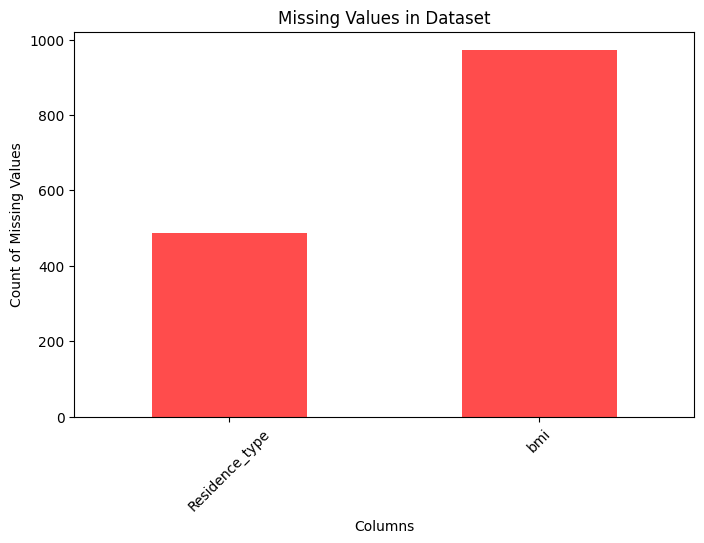

In [8]:
# Calculate missing values count
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Plot missing values as a bar chart
plt.figure(figsize=(8, 5))
missing_values.plot(kind='bar', color='red', alpha=0.7)
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [9]:
df.Residence_type.value_counts()

Residence_type
Urban    4888
Rural    4348
Name: count, dtype: int64

In [10]:
df.bmi.fillna(df.bmi.mean(), inplace=True)
# df.smoking_status.fillna('Unknown', inplace=True)
df.Residence_type.fillna('Urban', inplace=True)

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\261573868.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.bmi.fillna(df.bmi.mean(), inplace=True)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\261573868.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [11]:
df.isnull().sum()

gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                         0
smoking_status              0
Physical Activity Level     0
Chronic Stress Level        0
Family History of Stroke    0
stroke                      0
dtype: int64

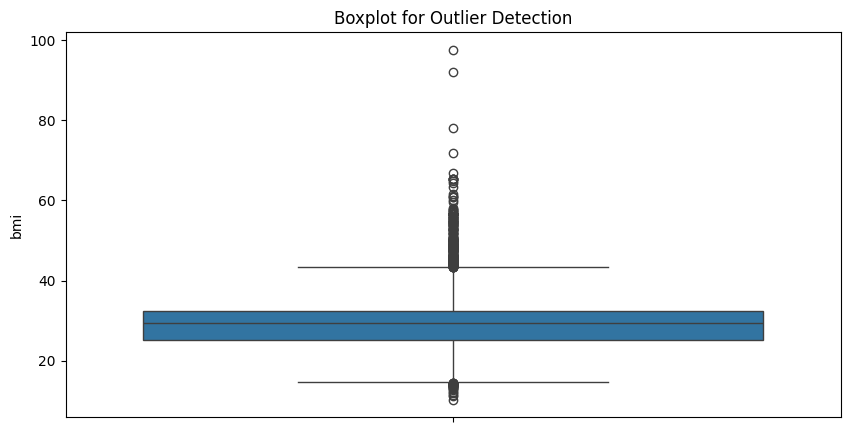

In [12]:
# Detect outliers using Boxplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(10,5))
sns.boxplot(data=df['bmi'])
plt.title("Boxplot for Outlier Detection")
plt.show()


In [13]:
# Remove outliers using IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df = remove_outliers(df, 'bmi')

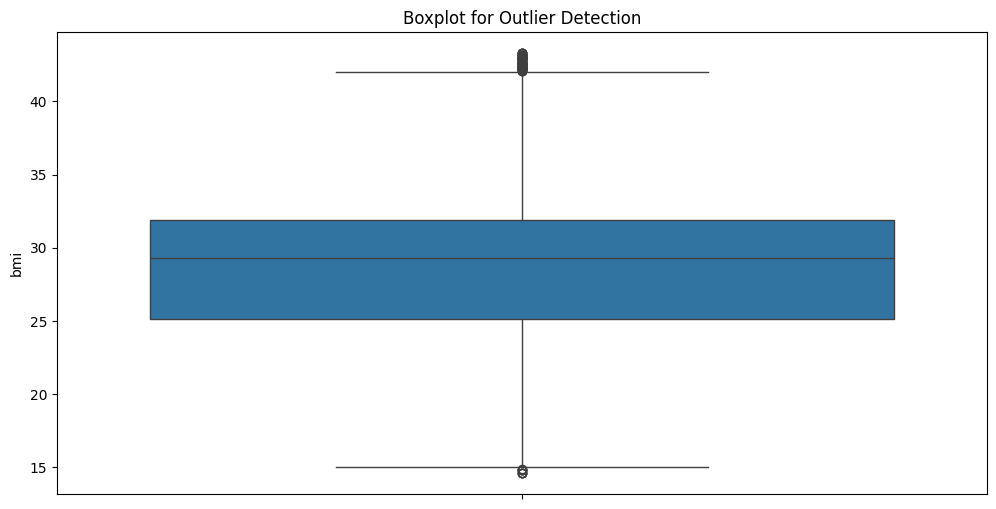

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df['bmi'])
plt.title("Boxplot for Outlier Detection")
plt.show()

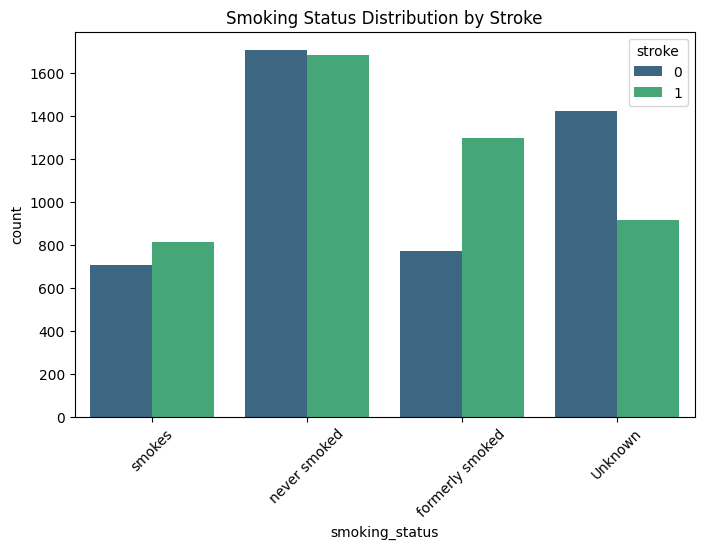

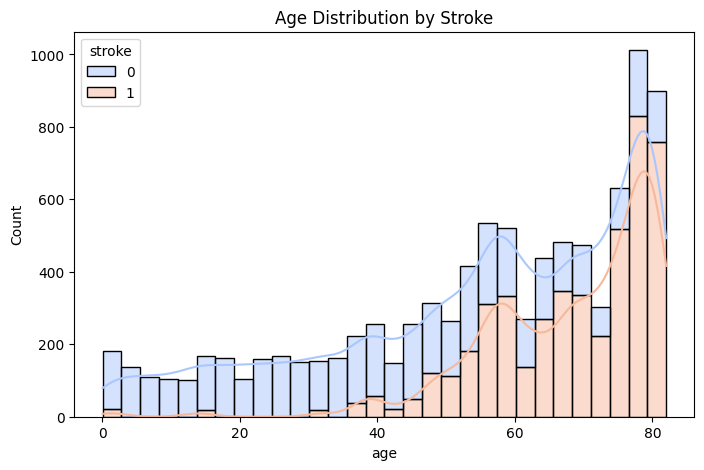

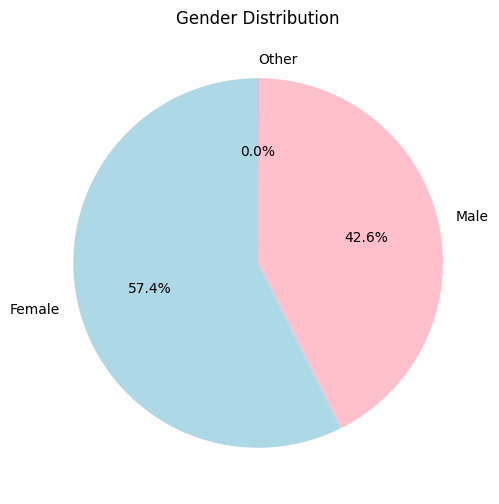

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\2728720775.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='bmi', data=df, palette='coolwarm')


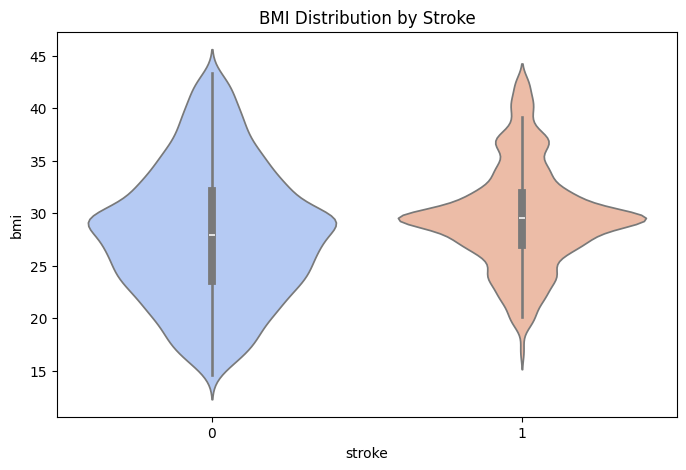

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\2728720775.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='smoking_status', y='avg_glucose_level', hue='stroke', data=df, palette='magma', ci=None)


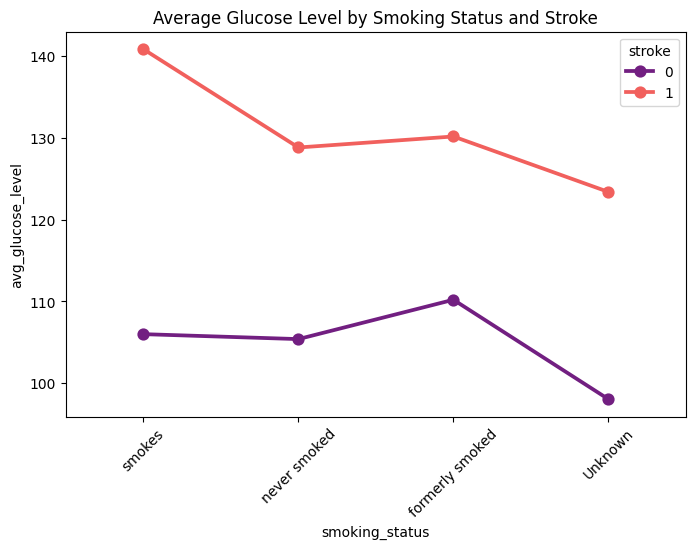

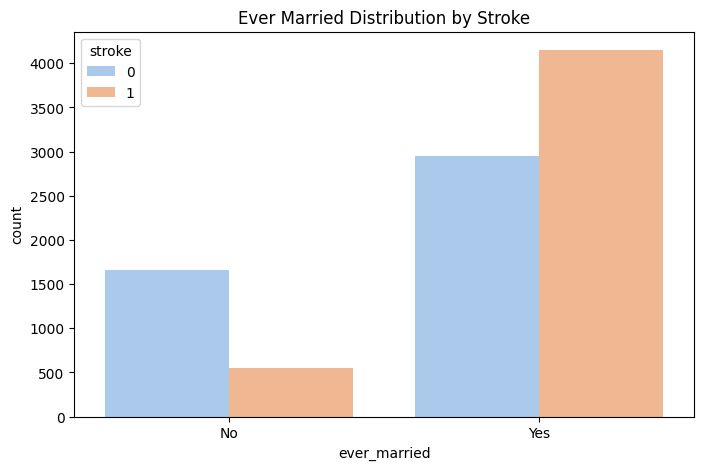

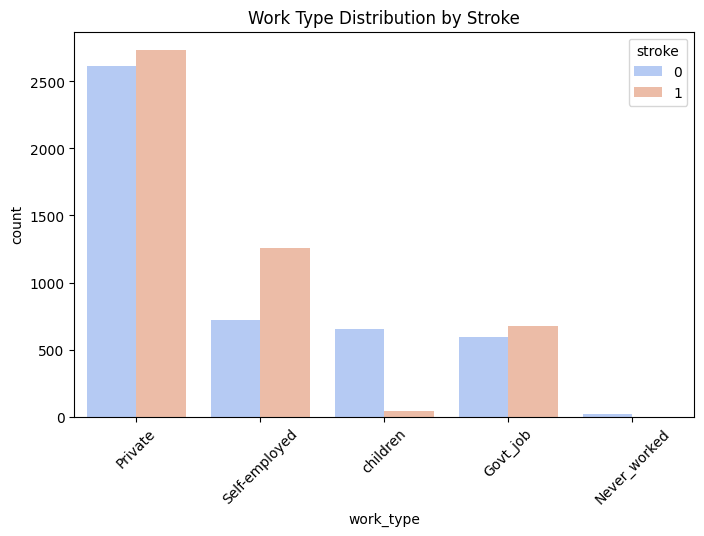

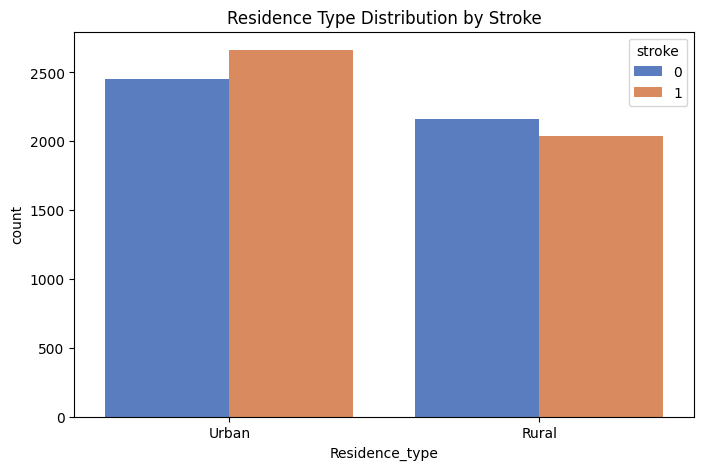

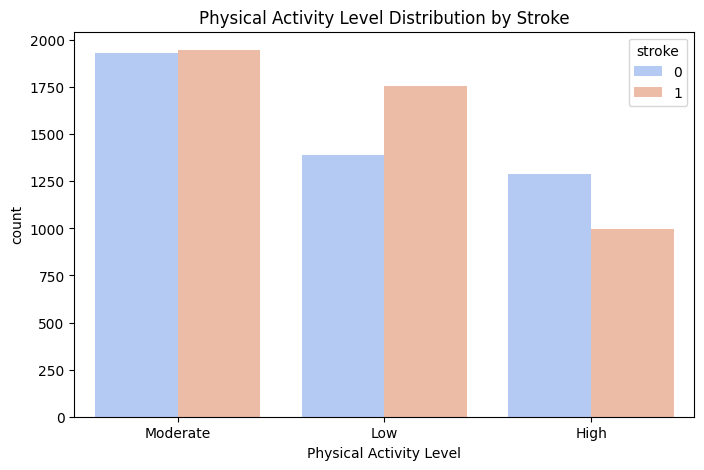

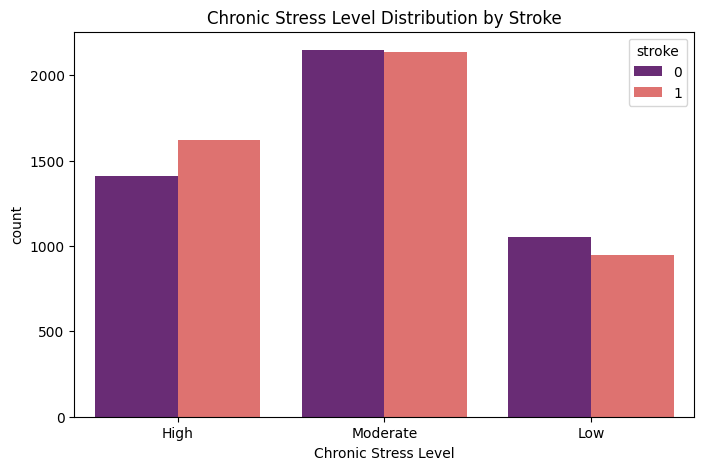

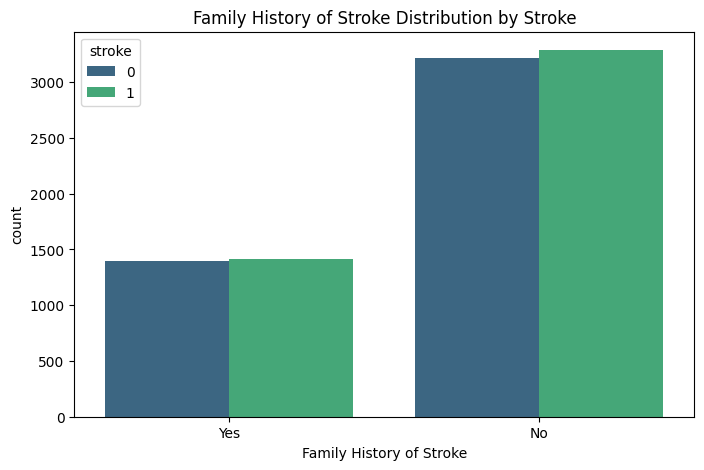

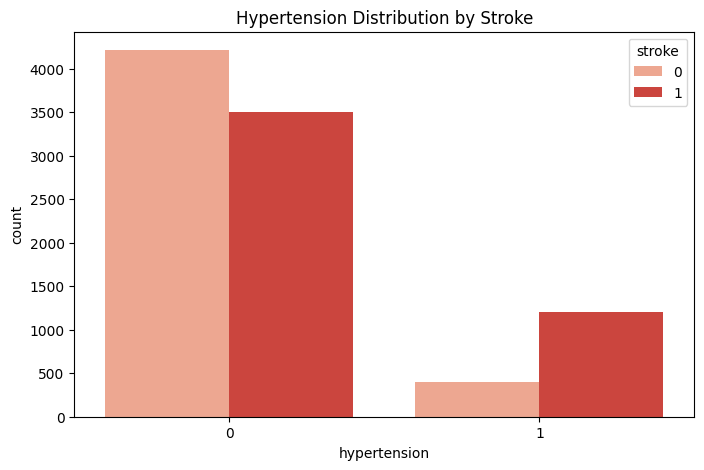

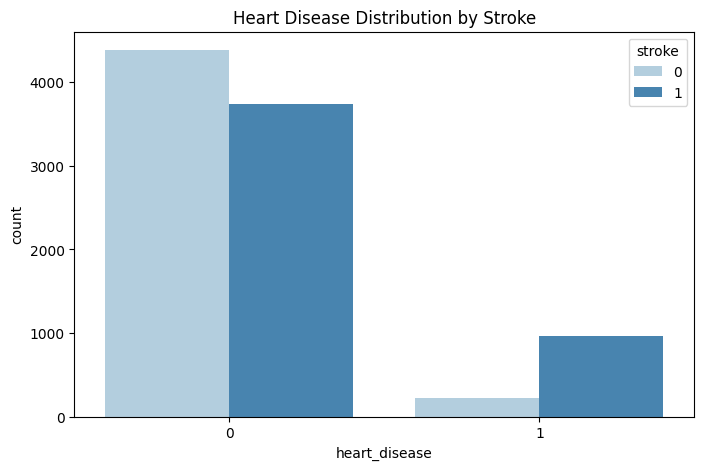

EDA Completed.


In [15]:
# Selecting important columns for visualization
selected_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender', 'smoking_status', 'stroke', 'ever_married', 'work_type', 'Residence_type', 'Physical Activity Level', 'Chronic Stress Level', 'Family History of Stroke']

# Bar Chart for Smoking Status with Stroke Hue
plt.figure(figsize=(8, 5))
sns.countplot(x='smoking_status', hue='stroke', data=df, palette='viridis')
plt.title("Smoking Status Distribution by Stroke")
plt.xticks(rotation=45)
plt.show()

# Histogram for Age Distribution by Stroke
plt.figure(figsize=(8, 5))
sns.histplot(df, x='age', hue='stroke', bins=30, kde=True, palette='coolwarm', multiple='stack')
plt.title("Age Distribution by Stroke")
plt.show()

# Pie Chart for Gender Distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink', 'purple'], startangle=90)
plt.title("Gender Distribution")
plt.show()

# Violin Plot for BMI by Stroke
plt.figure(figsize=(8, 5))
sns.violinplot(x='stroke', y='bmi', data=df, palette='coolwarm')
plt.title("BMI Distribution by Stroke")
plt.show()

# Point Plot for Average Glucose Level by Smoking Status and Stroke
plt.figure(figsize=(8, 5))
sns.pointplot(x='smoking_status', y='avg_glucose_level', hue='stroke', data=df, palette='magma', ci=None)
plt.title("Average Glucose Level by Smoking Status and Stroke")
plt.xticks(rotation=45)
plt.show()


# Bar Chart for Ever Married with Stroke Hue
plt.figure(figsize=(8, 5))
sns.countplot(x='ever_married', hue='stroke', data=df, palette='pastel')
plt.title("Ever Married Distribution by Stroke")
plt.show()

# Bar Chart for Work Type with Stroke Hue
plt.figure(figsize=(8, 5))
sns.countplot(x='work_type', hue='stroke', data=df, palette='coolwarm')
plt.title("Work Type Distribution by Stroke")
plt.xticks(rotation=45)
plt.show()

# Bar Chart for Residence Type with Stroke Hue
plt.figure(figsize=(8, 5))
sns.countplot(x='Residence_type', hue='stroke', data=df, palette='muted')
plt.title("Residence Type Distribution by Stroke")
plt.show()

# Bar Chart for Physical Activity Level with Stroke Hue
plt.figure(figsize=(8, 5))
sns.countplot(x='Physical Activity Level', hue='stroke', data=df, palette='coolwarm')
plt.title("Physical Activity Level Distribution by Stroke")
plt.show()

# Bar Chart for Chronic Stress Level with Stroke Hue
plt.figure(figsize=(8, 5))
sns.countplot(x='Chronic Stress Level', hue='stroke', data=df, palette='magma')
plt.title("Chronic Stress Level Distribution by Stroke")
plt.show()

# Bar Chart for Family History of Stroke with Stroke Hue
plt.figure(figsize=(8, 5))
sns.countplot(x='Family History of Stroke', hue='stroke', data=df, palette='viridis')
plt.title("Family History of Stroke Distribution by Stroke")
plt.show()

# Bar Chart for Hypertension with Stroke Hue
plt.figure(figsize=(8, 5))
sns.countplot(x='hypertension', hue='stroke', data=df, palette='Reds')
plt.title("Hypertension Distribution by Stroke")
plt.show()

# Bar Chart for Heart Disease with Stroke Hue
plt.figure(figsize=(8, 5))
sns.countplot(x='heart_disease', hue='stroke', data=df, palette='Blues')
plt.title("Heart Disease Distribution by Stroke")
plt.show()

print("EDA Completed.")

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=df, palette='viridis')


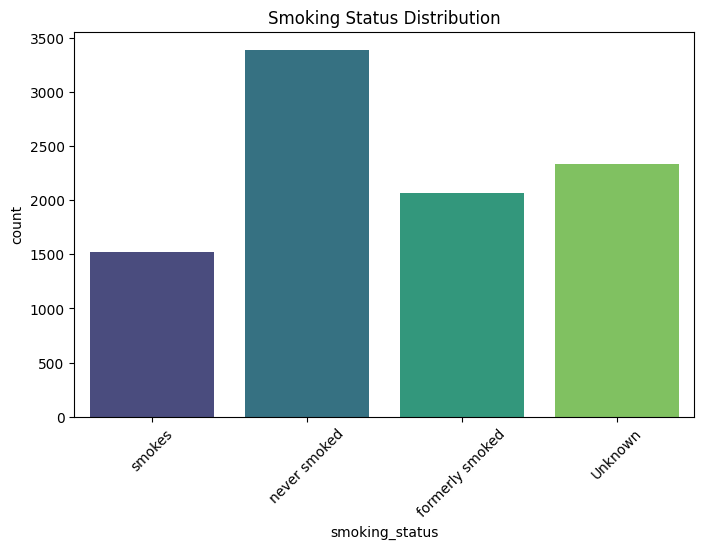

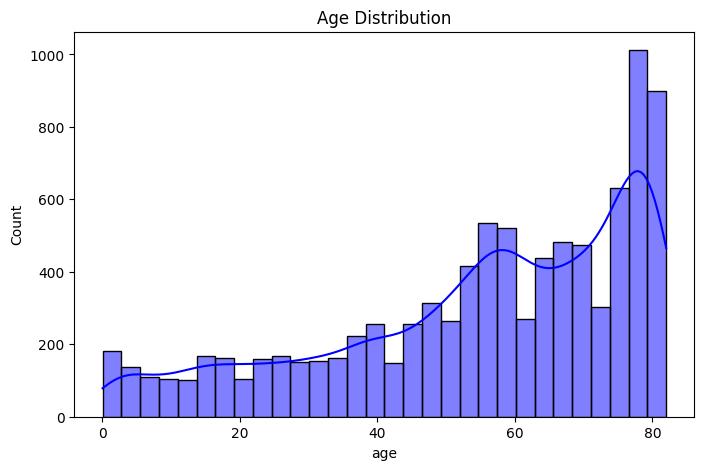

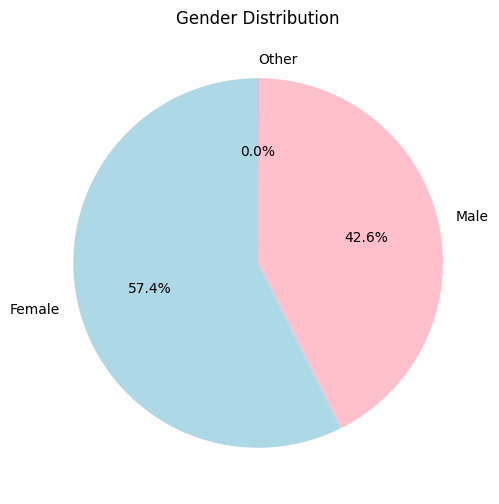

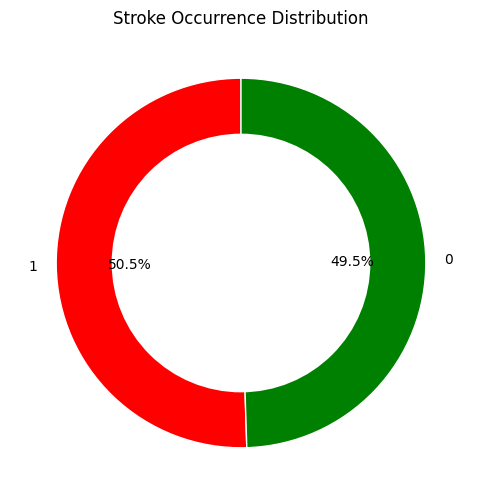

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y='bmi', data=df, palette='coolwarm')


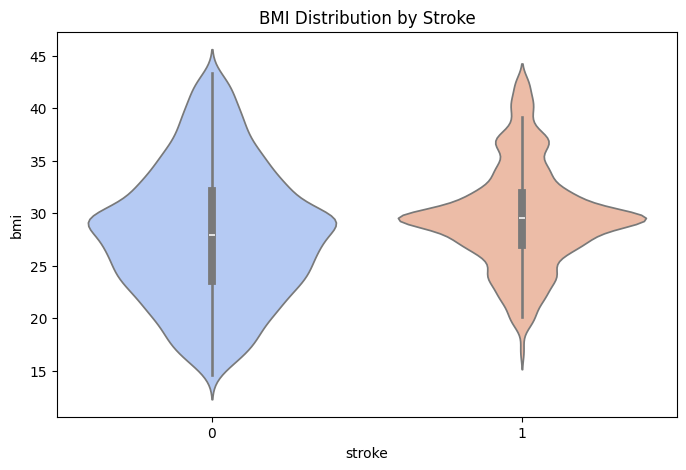

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='smoking_status', y='avg_glucose_level', data=df, palette='magma', ci=None)
C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='smoking_status', y='avg_glucose_level', data=df, palette='magma', ci=None)


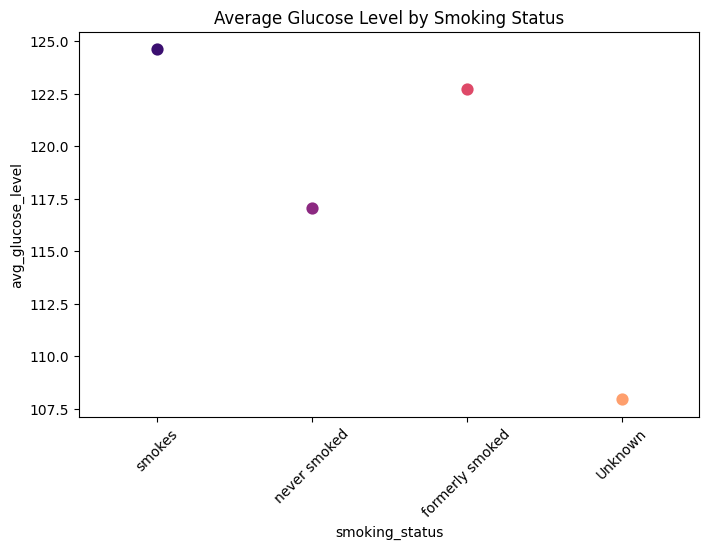

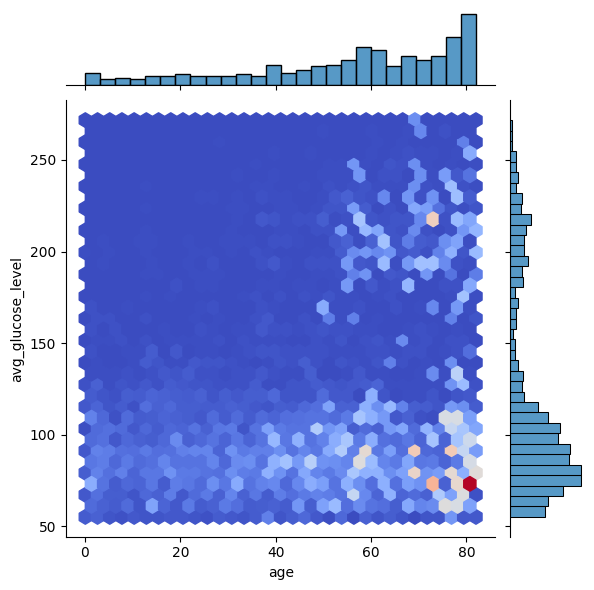

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ever_married', data=df, palette='pastel')


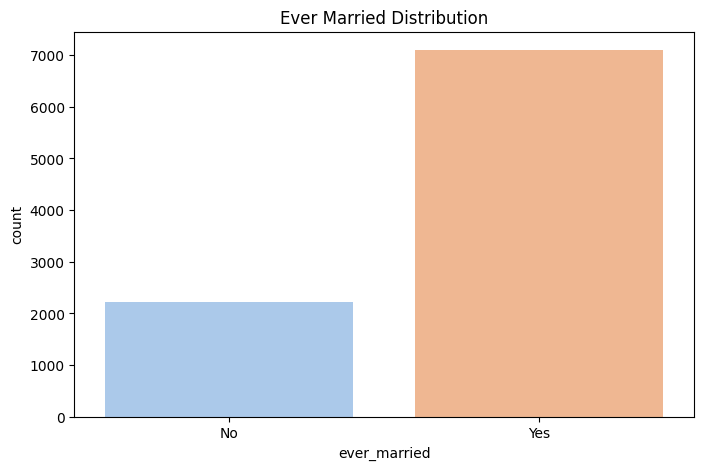

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_type', data=df, palette='coolwarm')


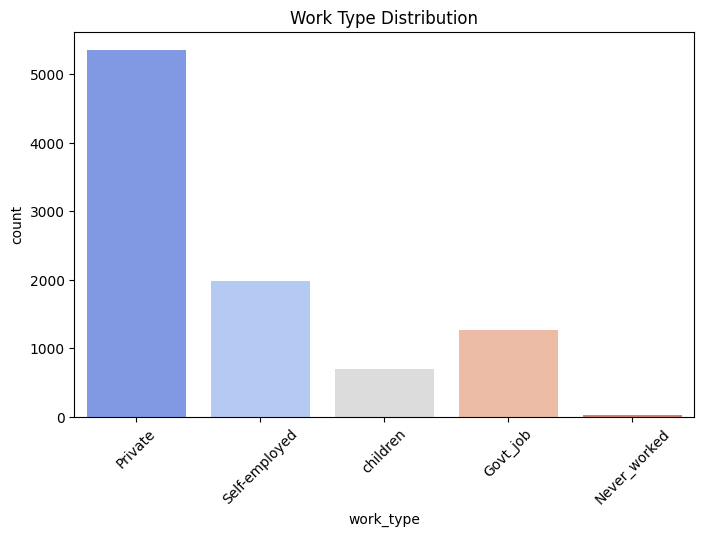

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Residence_type', data=df, palette='muted')


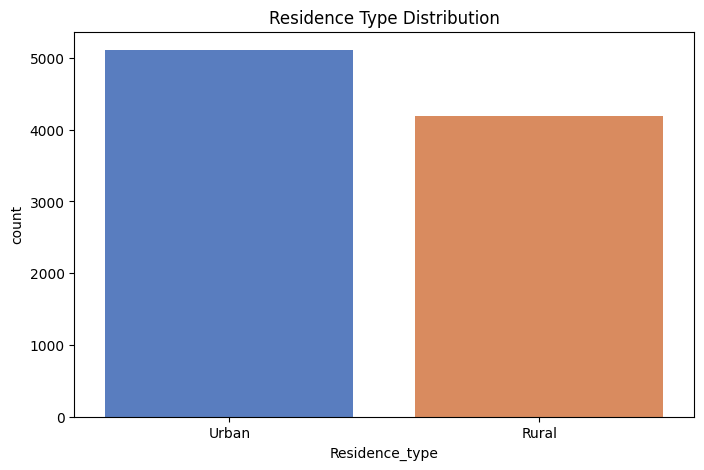

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Physical Activity Level', data=df, palette='coolwarm')


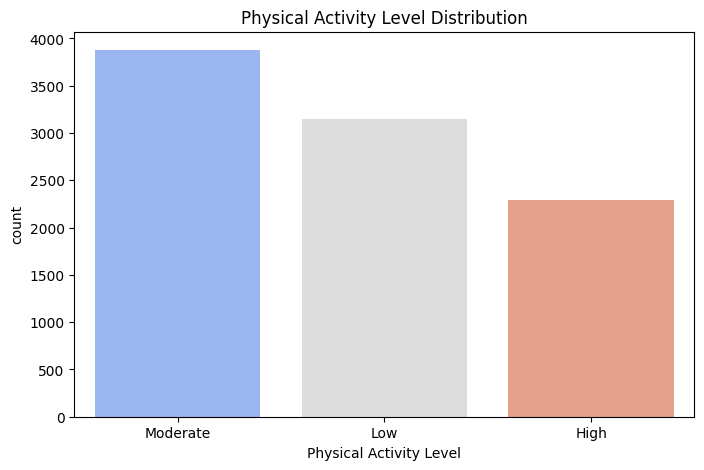

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Chronic Stress Level', data=df, palette='magma')


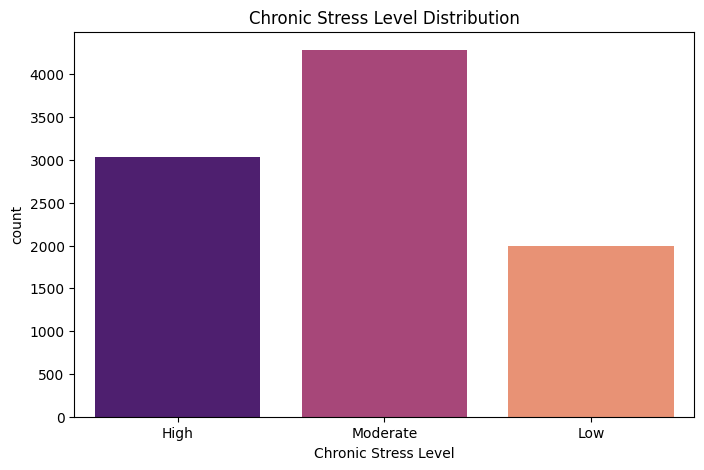

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family History of Stroke', data=df, palette='viridis')


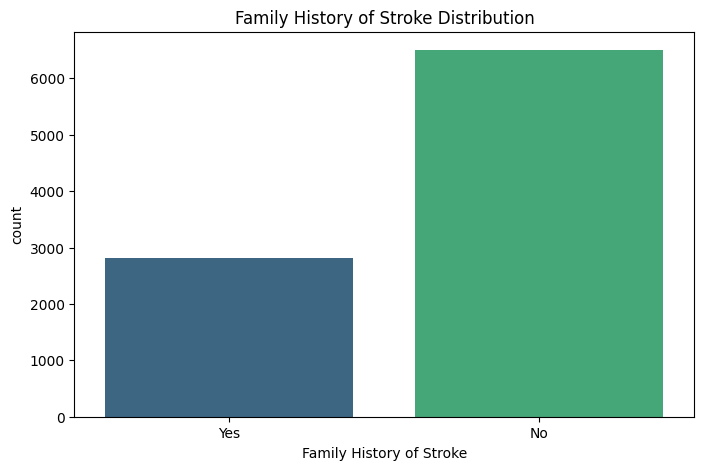

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=df, palette='Reds')


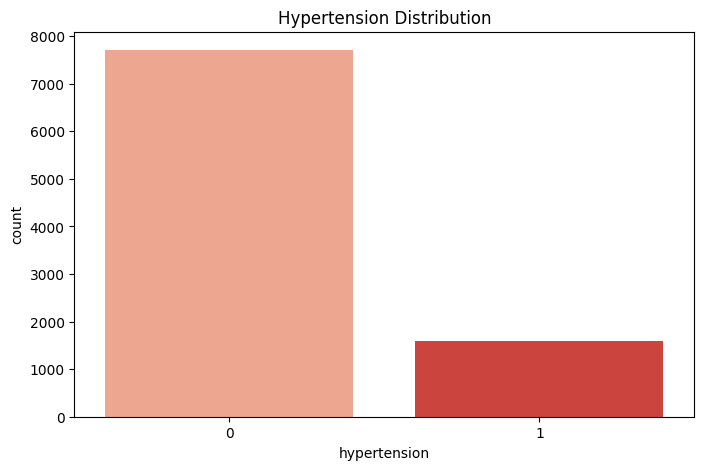

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\816843489.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=df, palette='Blues')


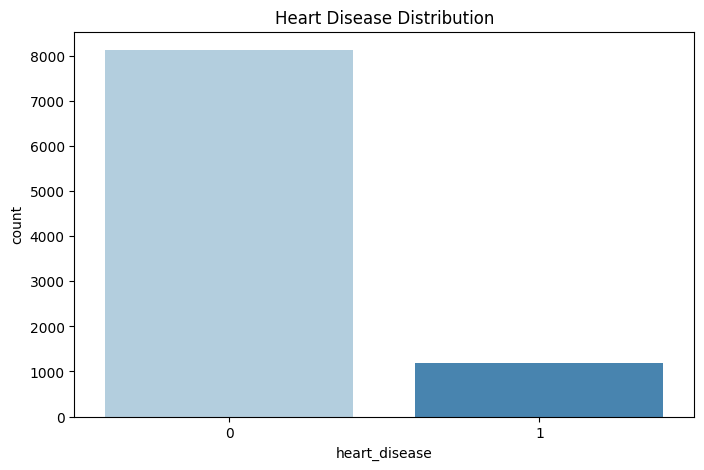

EDA Completed.


In [16]:
# Selecting important columns for visualization
selected_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender', 'smoking_status', 'stroke', 'ever_married', 'work_type', 'Residence_type', 'Physical Activity Level', 'Chronic Stress Level', 'Family History of Stroke']

# Bar Chart for categorical variables
plt.figure(figsize=(8, 5))
sns.countplot(x='smoking_status', data=df, palette='viridis')
plt.title("Smoking Status Distribution")
plt.xticks(rotation=45)
plt.show()

# Histogram for Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

# Pie Chart for Gender Distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink', 'purple'], startangle=90)
plt.title("Gender Distribution")
plt.show()

# Donut Chart for Stroke Distribution
stroke_counts = df['stroke'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=90, wedgeprops={'edgecolor': 'white'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Stroke Occurrence Distribution")
plt.show()

# Violin Plot for BMI by Stroke
plt.figure(figsize=(8, 5))
sns.violinplot(x='stroke', y='bmi', data=df, palette='coolwarm')
plt.title("BMI Distribution by Stroke")
plt.show()

# Point Plot for Average Glucose Level by Smoking Status
plt.figure(figsize=(8, 5))
sns.pointplot(x='smoking_status', y='avg_glucose_level', data=df, palette='magma', ci=None)
plt.title("Average Glucose Level by Smoking Status")
plt.xticks(rotation=45)
plt.show()

# Joint Plot for Age vs Average Glucose Level
sns.jointplot(x='age', y='avg_glucose_level', data=df, kind='hex', cmap='coolwarm')
plt.show()

# Bar Chart for Ever Married Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='ever_married', data=df, palette='pastel')
plt.title("Ever Married Distribution")
plt.show()

# Bar Chart for Work Type
plt.figure(figsize=(8, 5))
sns.countplot(x='work_type', data=df, palette='coolwarm')
plt.title("Work Type Distribution")
plt.xticks(rotation=45)
plt.show()

# Bar Chart for Residence Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Residence_type', data=df, palette='muted')
plt.title("Residence Type Distribution")
plt.show()

# Bar Chart for Physical Activity Level
plt.figure(figsize=(8, 5))
sns.countplot(x='Physical Activity Level', data=df, palette='coolwarm')
plt.title("Physical Activity Level Distribution")
plt.show()

# Bar Chart for Chronic Stress Level
plt.figure(figsize=(8, 5))
sns.countplot(x='Chronic Stress Level', data=df, palette='magma')
plt.title("Chronic Stress Level Distribution")
plt.show()

# Bar Chart for Family History of Stroke
plt.figure(figsize=(8, 5))
sns.countplot(x='Family History of Stroke', data=df, palette='viridis')
plt.title("Family History of Stroke Distribution")
plt.show()

# Bar Chart for Hypertension
plt.figure(figsize=(8, 5))
sns.countplot(x='hypertension', data=df, palette='Reds')
plt.title("Hypertension Distribution")
plt.show()

# Bar Chart for Heart Disease
plt.figure(figsize=(8, 5))
sns.countplot(x='heart_disease', data=df, palette='Blues')
plt.title("Heart Disease Distribution")
plt.show()

print("EDA Completed.")

In [17]:
# # Fill missing 'bmi' values with the median
# df['bmi'].fillna(df['bmi'].median(), inplace=True)

# # Fill missing 'smoking_status' with 'Unknown' as it is categorical
# df['smoking_status'].fillna('Unknown', inplace=True)

# # Verify that there are no missing values left
# df.isnull().sum()

In [18]:
df.smoking_status.unique()

array(['smokes', 'never smoked', 'formerly smoked', 'Unknown'],
      dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9309 entries, 0 to 9721
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    9309 non-null   object 
 1   age                       9309 non-null   float64
 2   hypertension              9309 non-null   int64  
 3   heart_disease             9309 non-null   int64  
 4   ever_married              9309 non-null   object 
 5   work_type                 9309 non-null   object 
 6   Residence_type            9309 non-null   object 
 7   avg_glucose_level         9309 non-null   float64
 8   bmi                       9309 non-null   float64
 9   smoking_status            9309 non-null   object 
 10  Physical Activity Level   9309 non-null   object 
 11  Chronic Stress Level      9309 non-null   object 
 12  Family History of Stroke  9309 non-null   object 
 13  stroke                    9309 non-null   int64  
dtypes: float64(3)

In [20]:
df.smoking_status=df.smoking_status.replace({'never smoked':0, 'formerly smoked':1, 'smokes':2, 'Unknown':3})

C:\Users\alurp\AppData\Local\Temp\ipykernel_17368\3423343713.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.smoking_status=df.smoking_status.replace({'never smoked':0, 'formerly smoked':1, 'smokes':2, 'Unknown':3})


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df[df.select_dtypes(include='object').columns]=df[df.select_dtypes(include='object').columns].apply(le.fit_transform) # no ordinal colns

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9309 entries, 0 to 9721
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    9309 non-null   int32  
 1   age                       9309 non-null   float64
 2   hypertension              9309 non-null   int64  
 3   heart_disease             9309 non-null   int64  
 4   ever_married              9309 non-null   int32  
 5   work_type                 9309 non-null   int32  
 6   Residence_type            9309 non-null   int32  
 7   avg_glucose_level         9309 non-null   float64
 8   bmi                       9309 non-null   float64
 9   smoking_status            9309 non-null   int64  
 10  Physical Activity Level   9309 non-null   int32  
 11  Chronic Stress Level      9309 non-null   int32  
 12  Family History of Stroke  9309 non-null   int32  
 13  stroke                    9309 non-null   int64  
dtypes: float64(3)

In [23]:
df.smoking_status.value_counts()

smoking_status
0    3388
3    2336
1    2066
2    1519
Name: count, dtype: int64

In [24]:
df.stroke.value_counts()

stroke
1    4701
0    4608
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
train_df , test_df= train_test_split(df,test_size=.2)

In [26]:
#temp1= train_df[train_df.stroke==1]
#train_df=pd.concat([train_df,temp1,temp1])
#train_df.stroke.value_counts()

In [27]:
train_df_x=train_df.iloc[:,0:-1]
train_df_y=train_df.iloc[:,-1]
test_df_x=test_df.iloc[:,0:-1]
test_df_y=test_df.iloc[:,-1]

In [28]:

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df_x)
X_test_scaled = scaler.transform(test_df_x)

In [29]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [30]:
from sklearn.linear_model import LogisticRegression
logreg_df= LogisticRegression()
logreg_df.fit(X_train_scaled, train_df_y)

LogisticRegression()

In [31]:
pred_test = logreg_df.predict(X_test_scaled)

In [32]:
from sklearn.metrics import confusion_matrix
tab1= confusion_matrix(test_df_y, pred_test)
tab1

array([[685, 234],
       [128, 815]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(test_df_y, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       919
           1       0.78      0.86      0.82       943

    accuracy                           0.81      1862
   macro avg       0.81      0.80      0.80      1862
weighted avg       0.81      0.81      0.80      1862



In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_scaled, train_df_y)

RandomForestClassifier()

In [35]:
pred_test_rfc = rfc.predict(X_test_scaled)

In [36]:
tab1_rfc=confusion_matrix(test_df_y, pred_test_rfc)
tab1_rfc

array([[878,  41],
       [  0, 943]], dtype=int64)

In [39]:
print(classification_report(test_df_y, pred_test_rfc))
print('Accuracy is --->', tab1_rfc.diagonal().sum()*100/tab1.sum())

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       919
           1       0.96      1.00      0.98       943

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862

Accuracy is ---> 97.79806659505908


In [40]:
from sklearn.tree import DecisionTreeClassifier
de= DecisionTreeClassifier()
de.fit(X_train_scaled, train_df_y)

DecisionTreeClassifier()

In [41]:
pred_test=de.predict(X_test_scaled)

In [42]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(test_df_y,pred_test)
tab1

array([[877,  42],
       [  0, 943]], dtype=int64)

In [43]:
print(classification_report(test_df_y,pred_test))
print('Accuracy is --->', tab1.diagonal().sum()*100/tab1.sum())

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       919
           1       0.96      1.00      0.98       943

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862

Accuracy is ---> 97.74436090225564


# svm

In [44]:
from  sklearn.svm import SVC
svc = SVC ()
svc.fit(X_train_scaled, train_df_y)
pred_test=svc.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(test_df_y,pred_test)
print(classification_report(test_df_y,pred_test))
print('Accuracy is --->', tab1.diagonal().sum()*100/tab1.sum())

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       919
           1       0.80      0.90      0.85       943

    accuracy                           0.83      1862
   macro avg       0.84      0.83      0.83      1862
weighted avg       0.84      0.83      0.83      1862

Accuracy is ---> 83.40494092373791


# Ada boost on Decision tree

In [45]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(de)
abc.fit(X_train_scaled, train_df_y)
pred_test_ada=abc.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(test_df_y,pred_test_ada)
print(tab1)
print(classification_report(test_df_y,pred_test_ada))
print('Accuracy is --->', tab1.diagonal().sum()*100/tab1.sum())

[[878  41]
 [  0 943]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       919
           1       0.96      1.00      0.98       943

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862

Accuracy is ---> 97.79806659505908


C:\Users\alurp\anaconda3\envs\new_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Hyperparameter tuning on decision tree and adaboost

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Define a stronger base estimator (not just a stump)
de = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=2)

# Increase n_estimators and tune learning_rate
abc = AdaBoostClassifier(estimator=de, n_estimators=100, learning_rate=0.5)

# Train the model
abc.fit(X_train_scaled, train_df_y)

# Make predictions
pred_test_ada = abc.predict(X_test_scaled)

# Evaluate
tab1 = confusion_matrix(test_df_y, pred_test_ada)
print(tab1)
print(classification_report(test_df_y, pred_test_ada))
print('Accuracy is --->', tab1.diagonal().sum() * 100 / tab1.sum())


C:\Users\alurp\anaconda3\envs\new_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[902  17]
 [  0 943]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       919
           1       0.98      1.00      0.99       943

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862

Accuracy is ---> 99.08700322234156


# XG boost Hyperparameter Tuning

In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create an XGBClassifier instance
xgb = XGBClassifier(n_estimators=170, learning_rate=0.25, max_depth=10, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb.fit(X_train_scaled, train_df_y)

# Predict on the test data
pred_test_xg = xgb.predict(X_test_scaled)

# Generate the confusion matrix
tab1 = confusion_matrix(test_df_y, pred_test_xg)

# Print results
print(tab1)
print(classification_report(test_df_y, pred_test_xg))
print('Accuracy is --->', tab1.diagonal().sum() * 100 / tab1.sum())

C:\Users\alurp\anaconda3\envs\new_env\lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[882  37]
 [  0 943]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       919
           1       0.96      1.00      0.98       943

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862

Accuracy is ---> 98.01288936627283


# Catboost 

In [48]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a CatBoostClassifier instance
catboost = CatBoostClassifier(iterations=250, learning_rate=0.3, depth=10, verbose=0)

# Fit the model to the training data
catboost.fit(X_train_scaled, train_df_y)

# Predict on the test data
pred_test_cat = catboost.predict(X_test_scaled)

# Generate the confusion matrix
tab2 = confusion_matrix(test_df_y, pred_test_cat)

# Print results
print(tab2)
print(classification_report(test_df_y, pred_test_cat))
print('Accuracy is --->', tab2.diagonal().sum() * 100 / tab2.sum())


[[898  21]
 [  1 942]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       919
           1       0.98      1.00      0.99       943

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862

Accuracy is ---> 98.81847475832438


# Conclusion

### After performing various Machine learning algorithms highest accuracy achieved is 99.02% of adaboost model on decision tree with hyperparameter tuning
### It's recall score and F1-score is also equal to 0.99 for both the classes.